# Quickstart
___

#### Overview:

Python package for classification of imbalanced data. Can be used to do any / all of the following: Balance training data, Fit models to imbalanced data, Evaluate models trained against imbalanced data

Imbalanced classification problems are incredibly common in the real world. Identifying fraudulent transactions, predicting who will be the highest spending customers, and predicting the likelihood of workplace accidents are all examples of imbalanced classification problems with significant real-world consequences. If a manufacturer could effectively identify the likelihood of a workplace accident, they could proactively fix the issue before the accident occurs. 

Aequilibrium is meant to be an "auto-ML" solution to imbalanced classification problems. From balancing the data with multiple industry-standard approaches, to fitting the model with specific imbalance approaches, to evaluating in ways geared towards imbalance, aequilibrium handles it all!

TODO|Description
---|---
[Install](#Install)|Install aequilibrium
[Prep](#Prep)|Prep environment
[Ingest](#Ingest)|Ingest your data
[Process](#Process)|Process your data
[Model](#Model)|Pass to aequilibrium for balancing, modeling, and evluation
[Evaluate](#Evaluate)|Pass model results to aequilibrium for evaluation

### Install

First, let's install aequilibrium with pip.

___

In [1]:
! pip install aequilibrium --user

Looking in indexes: https://xhadmgmtm1p.aetna.com/repos/pypi/mirror/simple
     |████████████████████████████████| 15.7 MB 18.0 MB/s eta 0:00:01
ERROR: ae2 0.71 requires pyspark>=2.4.4, which is not installed.
ERROR: prophet 1.0.1 requires cmdstanpy==0.9.68, which is not installed.
ERROR: prophet 1.0.1 requires setuptools-git>=1.2, which is not installed.
ERROR: fbprophet 0.6 requires cmdstanpy==0.4, which is not installed.
ERROR: fbprophet 0.6 requires setuptools-git>=1.2, which is not installed.
ERROR: ae2 0.71 has requirement tabulate>=0.8.7, but you'll have tabulate 0.8.6 which is incompatible.
ERROR: pmdarima 1.7.1 has requirement statsmodels<0.12,>=0.11, but you'll have statsmodels 0.14.0.dev0 which is incompatible.
ERROR: formulaic 0.5.2 has requirement typing-extensions>=4.2.0, but you'll have typing-extensions 3.10.0.2 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### Prep

Now, let's prepare our notebook environment with some conventional imports and options.

___

In [2]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

# format notebook display
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.options.display.float_format = "{:.4f}".format

### Ingest

We are ready to ingest our data. 

Aequilibrium has three main functions:
1. Balancing data: generating artificially balanced datasets through industry-standard approaches (random oversampling, random undersampling, SMOTE, etc.)
2. Modeling data: building classification models (can be passed any model with .fit(), .predict(), and .fit_predict() methods) 
3. Evaluating results: calculating model metrics and visualizing results

These functions can all be used on their own, but can also be iterated through together in an auto-ML type functionality (train_and_evaluate). In order to run the train_and_evaluate function, all the user needs is a training and validation dataset. Let's ingest those below:

___

In [3]:
# data can be downloaded here: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
base_df = pd.read_csv("data/kaggle_stroke_dataset.csv")

In [4]:
# aequilibrium does NOT process categorical variables for you (datasets must include only numerical columns)
base_df = base_df.select_dtypes(include=np.number)
base_df = base_df.dropna()

In [5]:
from sklearn.model_selection import train_test_split

# split data into train and val
train, val = train_test_split(base_df)

In [6]:
print("train shape: ", train.shape)
print("val shape: ", val.shape)

train shape:  (31453, 7)
val shape:  (10485, 7)


In [7]:
# definte features and target variable
features = ["age", "hypertension", "avg_glucose_level", "bmi"]
target = "stroke"

In [8]:
# check balance
print(base_df["stroke"].sum() / len(base_df))

0.015332156993657304


### Process

Now it's time to prepare the data to be used by aequilibrium. The package is designed to work with the DataSets class, so we will move our data to a DataSets instance. Additionally, we can feed the package any model that includes .fit(), .predict(), and .fit_predict() functionality (this is true of all sklearn models and most other modeling packages). We will do both below.


___

In [9]:
from aequilibrium.balance import Balance
from aequilibrium.dataset import DataSet
from aequilibrium.model import Model
from aequilibrium.results import Results
from aequilibrium.utils.api_wrapper import (
    get_best_results,
    train_and_evaluate,
    train_models,
)
from aequilibrium.visualize import Visualize

In [10]:
# must turn into aequilibrium DataSets first
train_data = DataSet(
    predictors=train[features],
    target=train[target],
)
val_data = DataSet(
    predictors=val[features],
    target=val[target],
)

In [11]:
# import packages

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# non-exhaustive sample of model imports that you can pass aequilibrium
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

### Model

Now we can use aequilibrium! We can simply feed train_and_evaluate our datasets with a few other keywords. Once we have the results, we can look at all model iterations and associated metrics. Additionally, we can use the Visualize class in aequilibrium to see useful visualizations. 

___

In [12]:
# run train_and_evaluate
# iterates through balancing approaches and models
modeling_results = train_and_evaluate(
    train_dataset=train_data,
    test_dataset=val_data,
    models=[LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier()],
    metric=[
        "true_positives",
        "true_negatives",
        "false_positives",
        "false_negatives",
        "precision",
        "recall",
        "sensitivity",
        "specificity",
        "f1_score",
        "auc_pr",
    ],
    sort_metric="auc_pr",
    balance_techniques=[
        "prototype_generation",
        "random_oversampling",
        "random_undersampling",
        "smote_oversampling",
        "smote_tomek",
        "smote_enn",
        "adasyn_sample",
    ],
    random_state=42,
)

In [13]:
# see all iterations and results
modeling_results

,balance_technique,model,train_result,test_result,true_positives,true_negatives,false_positives,false_negatives,precision,recall,sensitivity,specificity,f1_score,auc_pr,rank
0,smote_enn,<aequilibrium.model.Model object at 0x7f402284...,<aequilibrium.results.Results object at 0x7f40...,<aequilibrium.results.Results object at 0x7f40...,65,8636,1700,84,0.0368,0.4362,0.4362,0.8355,0.0679,0.1949,12.0000
1,random_undersampling,<aequilibrium.model.Model object at 0x7f40248e...,<aequilibrium.results.Results object at 0x7f40...,<aequilibrium.results.Results object at 0x7f40...,112,7350,2986,37,0.0362,0.7517,0.7517,0.7111,0.0690,0.1515,6.0000
2,adasyn_sample,<aequilibrium.model.Model object at 0x7f402284...,<aequilibrium.results.Results object at 0x7f40...,<aequilibrium.results.Results object at 0x7f40...,58,8935,1401,91,0.0398,0.3893,0.3893,0.8645,0.0721,0.1237,15.0000
3,prototype_generation,<aequilibrium.model.Model object at 0x7f402589...,<aequilibrium.results.Results object at 0x7f40...,<aequilibrium.results.Results object at 0x7f40...,113,7149,3187,36,0.0342,0.7584,0.7584,0.6917,0.0655,0.1175,3.0000
4,smote_tomek,<aequilibrium.model.Model object at 0x7f402283...,<aequilibrium.results.Results object at 0x7f40...,<aequilibrium.results.Results object at 0x7f40...,59,8937,1399,90,0.0405,0.3960,0.3960,0.8646,0.0734,0.1165,14.0000
5,smote_oversampling,<aequilibrium.model.Model object at 0x7f402485...,<aequilibrium.results.Results object at 0x7f40...,<aequilibrium.results.Results object at 0x7f40...,59,8938,1398,90,0.0405,0.3960,0.3960,0.8647,0.0735,0.1132,13.0000
6,prototype_generation,<aequilibrium.model.Model object at 0x7f402543...,<aequilibrium.results.Results object at 0x7f40...,<aequilibrium.results.Results object at 0x7f40...,113,7053,3283,36,0.0333,0.7584,0.7584,0.6824,0.0638,0.0757,4.0000
7,random_undersampling,<aequilibrium.model.Model object at 0x7f402281...,<aequilibrium.results.Results object at 0x7f40...,<aequilibrium.results.Results object at 0x7f40...,104,7529,2807,45,0.0357,0.6980,0.6980,0.7284,0.0680,0.0680,11.0000
8,random_oversampling,<aequilibrium.model.Model object at 0x7f402523...,<aequilibrium.results.Results object at 0x7f40...,<aequilibrium.results.Results object at 0x7f40...,29,9886,450,120,0.0605,0.1946,0.1946,0.9565,0.0924,0.0628,17.0000
9,random_oversampling,<aequilibrium.model.Model object at 0x7f402499...,<aequilibrium.results.Results object at 0x7f40...,<aequilibrium.results.Results object at 0x7f40...,117,7676,2660,32,0.0421,0.7852,0.7852,0.7426,0.0800,0.0616,1.0000


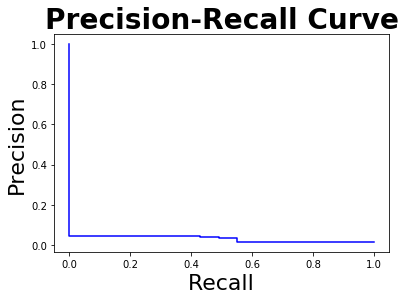

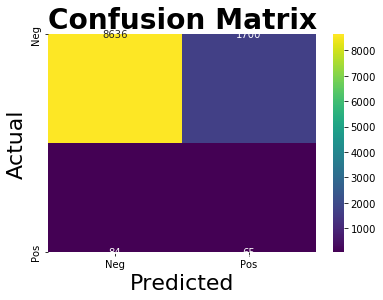

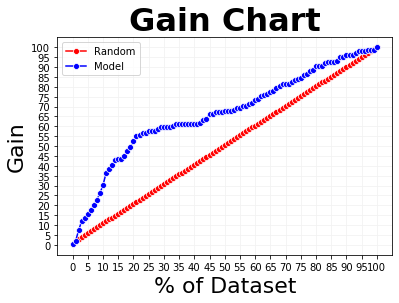

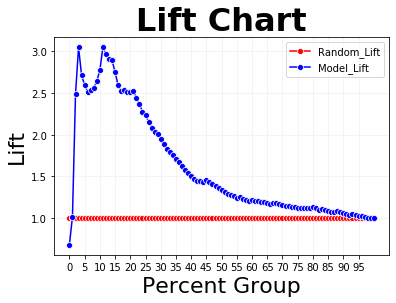

In [14]:
# you can now easily get the visualizations from the best model
best_results = modeling_results["test_result"][0]
viz = Visualize(best_results, num_decimals=2)
results_df = viz.complete_evaluation()

In [15]:
# see enrichment table for best model
results_df

,percentile,min_y_proba,max_y_proba,row_count,pos_count,perc_random_events,perc_actual_events,percentile_x_100,Random_Lift,precision,Model_Lift,recall
0,0.0000,1.0000,1.0000,53,1,0.9901,0.6711,0.0000,1,0.0189,0.6779,0.6711
1,0.0100,1.0000,1.0000,158,3,1.9802,2.0134,1.0000,1,0.0190,1.0168,2.0134
2,0.0200,1.0000,1.0000,263,11,2.9703,7.3826,2.0000,1,0.0418,2.4855,7.3826
3,0.0300,1.0000,1.0000,367,18,3.9604,12.0805,3.0000,1,0.0490,3.0503,12.0805
4,0.0400,1.0000,1.0000,472,20,4.9505,13.4228,4.0000,1,0.0424,2.7114,13.4228
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.9600,0.0000,0.0000,10119,146,96.0396,97.9866,96.0000,1,0.0144,1.0203,97.9866
97,0.9700,0.0000,0.0000,10223,147,97.0297,98.6577,97.0000,1,0.0144,1.0168,98.6577
98,0.9800,0.0000,0.0000,10328,147,98.0198,98.6577,98.0000,1,0.0142,1.0065,98.6577
99,0.9900,0.0000,0.0000,10433,147,99.0099,98.6577,99.0000,1,0.0141,0.9964,98.6577


### Evaluate

Let's say you already built a model and just want to use the evaluation functionality of aequilibrium. As long as you have the true values, predictions, and probability predictions then you are set! 
___

In [16]:
# pull in results from already built model
results_df = pd.read_csv("data/kaggle_stroke_results.csv")
results_df.head()

,Unnamed: 0,age,avg_glucose_level,bmi,stroke,y_pred,y_proba
0,1,58.0000,87.9600,39.2000,0,0,0.0100
1,3,70.0000,69.0400,35.9000,0,0,0.0400
2,6,52.0000,77.5900,17.7000,0,0,0.0000
3,7,75.0000,243.5300,27.0000,0,0,0.0500
4,8,32.0000,77.6700,32.3000,0,0,0.0000


In [17]:
y_true = "stroke"
y_pred = "y_pred"
y_proba = "y_proba"

In [18]:
# use the Results class in aequilibrium for easy functionality
results_class = Results(results_df[y_true], results_df[y_pred], results_df[y_proba])

In [19]:
# Visualize class takes a Results class instance as input
results_viz = Visualize(results_class, num_decimals=5)

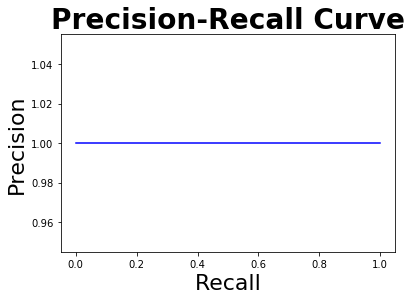

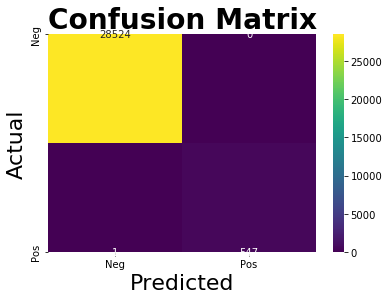

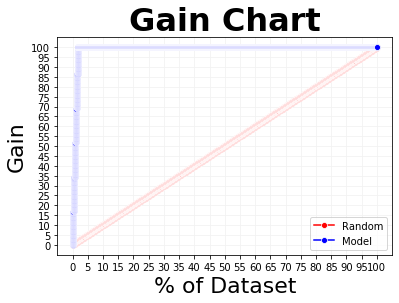

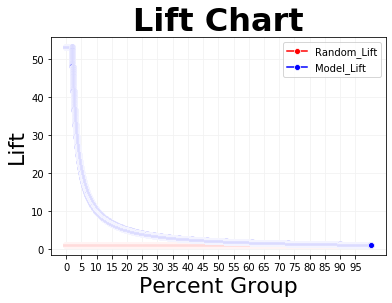

,percentile,min_y_proba,max_y_proba,row_count,pos_count,perc_random_events,perc_actual_events,percentile_x_100,Random_Lift,precision,Model_Lift,recall
0,0.0000,0.8100,0.8100,1,1,0.0034,0.1825,0.0000,1,1.0000,53.0511,0.1825
1,0.0000,0.8000,0.8000,2,2,0.0069,0.3650,0.0030,1,1.0000,53.0511,0.3650
2,0.0001,0.7900,0.7900,3,3,0.0103,0.5474,0.0070,1,1.0000,53.0511,0.5474
3,0.0001,0.7900,0.7900,4,4,0.0138,0.7299,0.0100,1,1.0000,53.0511,0.7299
4,0.0001,0.7800,0.7800,5,5,0.0172,0.9124,0.0140,1,1.0000,53.0511,0.9124
...,...,...,...,...,...,...,...,...,...,...,...,...
29067,0.9998,0.0000,0.0000,29068,548,99.9862,100.0000,99.9830,1,0.0189,1.0001,100.0000
29068,0.9999,0.0000,0.0000,29069,548,99.9897,100.0000,99.9860,1,0.0189,1.0001,100.0000
29069,0.9999,0.0000,0.0000,29070,548,99.9931,100.0000,99.9900,1,0.0189,1.0001,100.0000
29070,0.9999,0.0000,0.0000,29071,548,99.9966,100.0000,99.9930,1,0.0189,1.0000,100.0000


In [20]:
# complete_evaluation saves all associated plots
results_viz.complete_evaluation(save_dir="my_plots")